<a href="https://colab.research.google.com/github/abhirajkumar20/Heart-Disease-Classification-using-Deep-Learning-Models/blob/main/MP_TF_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Setup

import pandas as pd
import numpy as np

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Heart = pd.read_csv("/content/drive/MyDrive/heart.csv")
Heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


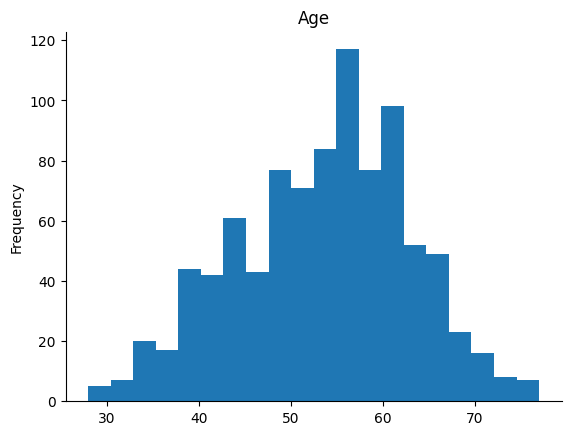

In [ ]:
# @title Age

from matplotlib import pyplot as plt
Heart['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
Heart_features = Heart.copy()
Heart_labels = Heart_features.pop('HeartDisease')

In [ ]:
inputs = {}

for name, column in Heart_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'Age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Age')>,
 'Sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Sex')>,
 'ChestPainType': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'ChestPainType')>,
 'RestingBP': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'RestingBP')>,
 'Cholesterol': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Cholesterol')>,
 'FastingBS': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'FastingBS')>,
 'RestingECG': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'RestingECG')>,
 'MaxHR': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'MaxHR')>,
 'ExerciseAngina': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'ExerciseAngina')>,
 'Oldpeak': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Oldpeak')>,
 'ST_Slope': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'ST_Slope')>}

In [ ]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(Heart[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'normalization')>

In [ ]:
preprocessed_inputs = [all_numeric_inputs]

In [ ]:
preprocessed_inputs

[<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'normalization')>]

In [ ]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(Heart_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

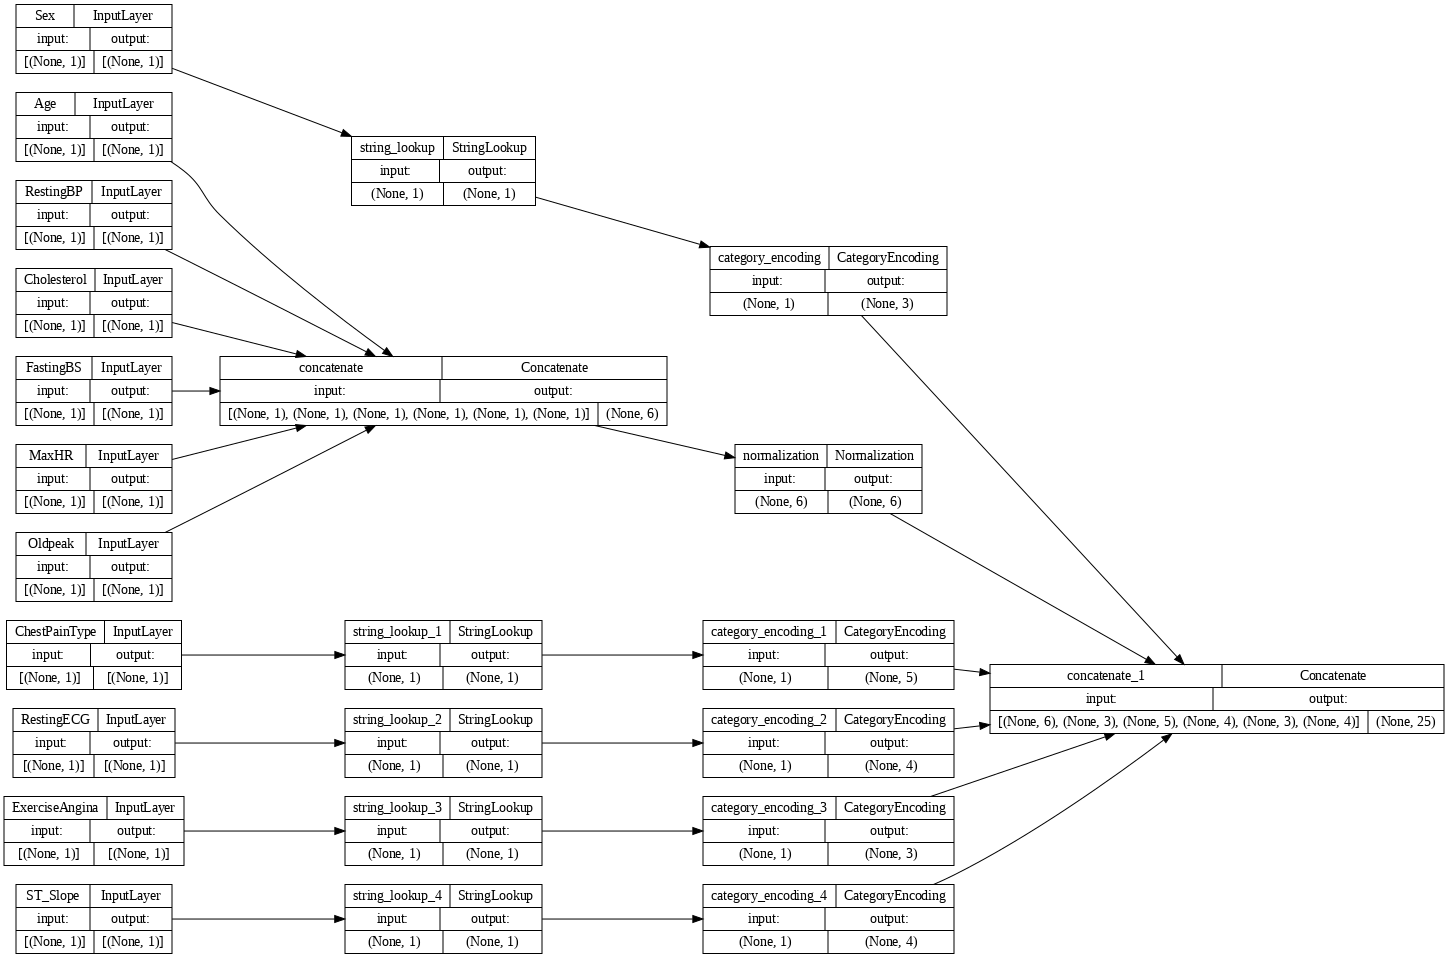

In [ ]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

Heart_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = Heart_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [ ]:
preprocessed_inputs_cat

<KerasTensor: shape=(None, 25) dtype=float32 (created by layer 'concatenate_1')>

In [ ]:
Heart_features_dict = {name: np.array(value)
                         for name, value in Heart_features.items()}
Heart_features_dict

{'Age': array([40, 49, 37, 48, 54, 39, 45, 54, 37, 48, 37, 58, 39, 49, 42, 54, 38,
        43, 60, 36, 43, 44, 49, 44, 40, 36, 53, 52, 53, 51, 53, 56, 54, 41,
        43, 32, 65, 41, 48, 48, 54, 54, 35, 52, 43, 59, 37, 50, 36, 41, 50,
        47, 45, 41, 52, 51, 31, 58, 54, 52, 49, 43, 45, 46, 50, 37, 45, 32,
        52, 44, 57, 44, 52, 44, 55, 46, 32, 35, 52, 49, 55, 54, 63, 52, 56,
        66, 65, 53, 43, 55, 49, 39, 52, 48, 39, 58, 43, 39, 56, 41, 65, 51,
        40, 40, 46, 57, 48, 34, 50, 39, 59, 57, 47, 38, 49, 33, 38, 59, 35,
        34, 47, 52, 46, 58, 58, 54, 34, 48, 54, 42, 38, 46, 56, 56, 61, 49,
        43, 39, 54, 43, 52, 50, 47, 53, 56, 39, 42, 43, 50, 54, 39, 48, 40,
        55, 41, 56, 38, 49, 44, 54, 59, 49, 47, 42, 52, 46, 50, 48, 58, 58,
        29, 40, 53, 49, 52, 43, 54, 59, 37, 46, 52, 51, 52, 46, 54, 58, 58,
        41, 50, 53, 46, 50, 48, 45, 41, 62, 49, 42, 53, 57, 47, 46, 42, 31,
        56, 50, 35, 35, 28, 54, 48, 50, 56, 56, 47, 30, 39, 54, 55, 29, 46,
     

In [ ]:
features_dict = {name:values[:] for name, values in Heart_features_dict.items()}
b=Heart_preprocessing(features_dict)

In [ ]:
b

<tf.Tensor: shape=(918, 25), dtype=float32, numpy=
array([[-1.433,  0.411,  0.825, ...,  0.   ,  0.   ,  1.   ],
       [-0.478,  1.492, -0.172, ...,  0.   ,  1.   ,  0.   ],
       [-1.751, -0.13 ,  0.77 , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [ 0.37 , -0.13 , -0.62 , ...,  0.   ,  1.   ,  0.   ],
       [ 0.37 , -0.13 ,  0.34 , ...,  0.   ,  1.   ,  0.   ],
       [-1.645,  0.303, -0.218, ...,  0.   ,  0.   ,  1.   ]],
      dtype=float32)>

In [ ]:
Heart_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])
Heart_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=25, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

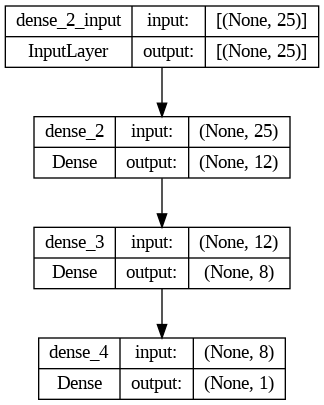

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from keras import layers

model1 = Sequential()
model1.add(Dense(12, input_dim=25, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dense(128, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Dense(32, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.35))
model1.add(Flatten())
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(8, activation='softmax'))


ValueError: Input 0 of layer "max_pooling2d" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 12)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
model = Sequential()
model.add(tf.keras.Input(shape=(25,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
pip install visualkeras

In [ ]:
import visualkeras
visualkeras.layered_view(model)


In [ ]:
visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
visualkeras.layered_view(model, legend=True) # selected font

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

def Heart_model(preprocessing_head, inputs):
  body = tf.keras.Sequential()
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation
from keras import layers

model = Sequential()
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

preprocessed_inputs = preprocessing.head(inputs)
result = body(preprocessed_inputs)
model = tf.keras.Model(inputs, result)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
return model

Heart_model = Heart_model(Heart_preprocessing, inputs)

#tf.keras.utils.plot_model(model = Heart_model , rankdir="LR", dpi=72, show_shapes=True)
plot_model(Heart_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
Heart_model.fit(x=Heart_features_dict, y=Heart_labels, epochs=10)

In [ ]:
Heart_model.save('test')
reloaded = tf.keras.models.load_model('test')

In [ ]:
features_dict = {name:values[:1] for name, values in Heart_features_dict.items()}

before = Heart_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

In [ ]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

In [ ]:
for example in slices(Heart_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

In [ ]:
Heart_ds = tf.data.Dataset.from_tensor_slices((Heart_features_dict, Heart_labels))

In [ ]:
Heart_batches = Heart_ds.shuffle(len(Heart_labels)).batch(32)

In [ ]:
Heart_model.fit(Heart_batches, epochs=5)

In [ ]:
Heart_file_path = tf.keras.utils.get_file("heart.csv", "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download")

In [ ]:
#define file path
Heart_file_path = "/content/drive/MyDrive/heart.csv"

# Assuming HeartDisease as the label column
Heart_csv_ds = tf.data.experimental.make_csv_dataset(
    Heart_file_path,
    batch_size=5,
    label_name='HeartDisease',
    num_epochs=1,
    ignore_errors=True,
    shuffle=True,
    num_parallel_reads=tf.data.AUTOTUNE)

In [ ]:
for batch, label in Heart_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

In [ ]:
import pathlib
Heart_file_path = "/content/drive/MyDrive/heart.csv"

text = pathlib.Path(Heart_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings